In [1]:
!pip install simpletransformers
!pip install pythainlp

"""!pip install pythainlp six sentencepiece python-crfsuite
!git clone https://github.com/ThAIKeras/bert"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 

'!pip install pythainlp six sentencepiece python-crfsuite\n!git clone https://github.com/ThAIKeras/bert'

#Pre-tokenization !!! MUST DO !!! 

# IF U USE monsoon-nlp/bert-base-thai

In [2]:
'''
import collections
import unicodedata
import six

def convert_to_unicode(text):
  if six.PY3:
    if isinstance(text, str):
      return text
    elif isinstance(text, bytes):
      return text.decode("utf-8", "ignore")
    else:
      raise ValueError("Unsupported string type: %s" % (type(text)))
  elif six.PY2:
    if isinstance(text, str):
      return text.decode("utf-8", "ignore")
    elif isinstance(text, unicode):
      return text
    else:
      raise ValueError("Unsupported string type: %s" % (type(text)))
  else:
    raise ValueError("Not running on Python2 or Python 3?")

def load_vocab(vocab_file):
  vocab = collections.OrderedDict()
  index = 0
  with open(vocab_file, "r") as reader:
    while True:
      token = reader.readline()
      if token.split(): token = token.split()[0] # to support SentencePiece vocab file
      token = convert_to_unicode(token)
      if not token:
        break
      token = token.strip()
      vocab[token] = index
      index += 1
  return vocab

#####

from bert.bpe_helper import BPE
import sentencepiece as spm

def convert_by_vocab(vocab, items):
  output = []
  for item in items:
    output.append(vocab[item])
  return output

class ThaiTokenizer(object):
  """Tokenizes Thai texts."""

  def __init__(self, vocab_file, spm_file):
    self.vocab = load_vocab(vocab_file)
    self.inv_vocab = {v: k for k, v in self.vocab.items()}

    self.bpe = BPE(vocab_file)    
    self.s = spm.SentencePieceProcessor()
    self.s.Load(spm_file)

  def tokenize(self, text):
    bpe_tokens = self.bpe.encode(text).split(' ')
    spm_tokens = self.s.EncodeAsPieces(text)

    tokens = bpe_tokens if len(bpe_tokens) < len(spm_tokens) else spm_tokens

    split_tokens = []

    for token in tokens:
      new_token = token

      if token.startswith('_') and not token in self.vocab:
        split_tokens.append('_')
        new_token = token[1:]

      if not new_token in self.vocab:
        split_tokens.append('<unk>')
      else:
        split_tokens.append(new_token)

    return split_tokens

  def convert_tokens_to_ids(self, tokens):
    return convert_by_vocab(self.vocab, tokens)

  def convert_ids_to_tokens(self, ids):
    return convert_by_vocab(self.inv_vocab, ids)
'''

'\nimport collections\nimport unicodedata\nimport six\n\ndef convert_to_unicode(text):\n  if six.PY3:\n    if isinstance(text, str):\n      return text\n    elif isinstance(text, bytes):\n      return text.decode("utf-8", "ignore")\n    else:\n      raise ValueError("Unsupported string type: %s" % (type(text)))\n  elif six.PY2:\n    if isinstance(text, str):\n      return text.decode("utf-8", "ignore")\n    elif isinstance(text, unicode):\n      return text\n    else:\n      raise ValueError("Unsupported string type: %s" % (type(text)))\n  else:\n    raise ValueError("Not running on Python2 or Python 3?")\n\ndef load_vocab(vocab_file):\n  vocab = collections.OrderedDict()\n  index = 0\n  with open(vocab_file, "r") as reader:\n    while True:\n      token = reader.readline()\n      if token.split(): token = token.split()[0] # to support SentencePiece vocab file\n      token = convert_to_unicode(token)\n      if not token:\n        break\n      token = token.strip()\n      vocab[token] =

In [3]:
"""
! rm th.wiki*
! wget https://raw.githubusercontent.com/jitkapat/thaipostagger/master/th.wiki.bpe.op25000.model
! wget https://raw.githubusercontent.com/jitkapat/thaipostagger/master/th.wiki.bpe.op25000.vocab"""

'\n! rm th.wiki*\n! wget https://raw.githubusercontent.com/jitkapat/thaipostagger/master/th.wiki.bpe.op25000.model\n! wget https://raw.githubusercontent.com/jitkapat/thaipostagger/master/th.wiki.bpe.op25000.vocab'

In [4]:
"""from pythainlp import sent_tokenize
tokenizer = ThaiTokenizer(vocab_file='th.wiki.bpe.op25000.vocab', spm_file='th.wiki.bpe.op25000.model')  

og_text = "กรุงเทพมหานครเป็นเขตปกครองพิเศษของประเทศไทย มิได้มีสถานะเป็นจังหวัด คำว่า \"กรุงเทพมหานคร\" นั้นยังใช้เรียกองค์กรปกครองส่วนท้องถิ่นของกรุงเทพมหานครอีกด้วย"
split_sentences = sent_tokenize(og_text)
split_sentences"""

'from pythainlp import sent_tokenize\ntokenizer = ThaiTokenizer(vocab_file=\'th.wiki.bpe.op25000.vocab\', spm_file=\'th.wiki.bpe.op25000.model\')  \n\nog_text = "กรุงเทพมหานครเป็นเขตปกครองพิเศษของประเทศไทย มิได้มีสถานะเป็นจังหวัด คำว่า "กรุงเทพมหานคร" นั้นยังใช้เรียกองค์กรปกครองส่วนท้องถิ่นของกรุงเทพมหานครอีกด้วย"\nsplit_sentences = sent_tokenize(og_text)\nsplit_sentences'

# Import Library

In [5]:
from transformers import AutoTokenizer, AutoModel
from transformers import pipeline
import numpy as np
import pandas as pd

from pythainlp import word_tokenize
import re
from pythainlp.corpus import thai_stopwords
from tqdm import tqdm

from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

import torch

import warnings

warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [6]:
import torch
torch.cuda.is_available()

True

In [7]:
thai_stop_words = thai_stopwords()

In [8]:
pretrained = "Geotrend/bert-base-th-cased"
name = pretrained

tokenizer = AutoTokenizer.from_pretrained(name, use_fast=True) # Comments this one if use monsoon-nlp/bert-base-thai

model = AutoModel.from_pretrained(name)

Some weights of the model checkpoint at Geotrend/bert-base-th-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at Geotrend/bert-base-th-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.de

# Preprocessing

In [9]:
"""text = ["สวัสดีครับ ฉันชื่อโก้ ฉันชอบกินกล้วย ฉันเป็นคนเก่ง"]

sent_id = tokenizer.batch_encode_plus(text, padding=True)


print(sent_id)"""

'text = ["สวัสดีครับ ฉันชื่อโก้ ฉันชอบกินกล้วย ฉันเป็นคนเก่ง"]\n\nsent_id = tokenizer.batch_encode_plus(text, padding=True)\n\n\nprint(sent_id)'

 # Text Classification

In [10]:
df = pd.read_csv('main_suicidal_data.csv')
df.head(5)

,Unnamed: 0,DateTime,Uid,Tweet,Label (Specialist),HashTag
0,0,18/5/2021 07:24,a38755f80aee,ถ้าฉันตายไปจริงๆก็คงดีสินะ,Level 2,#โรคซึมเศร้า
1,1,20/5/2021 16:06,a38755f80aee,เหนื่อยเหนื่อยจนจะตายอยู่แล้วมันไมกันนะนั่งเล่...,Level 1,#โรคซึมเศร้า
2,2,16/6/2021 07:00,9b7d113b270a,พยายามที่จะมีชีวิตอยู่แต่ก็เหนื่อยกับโลกนี้เหล...,Level 1,#โรคซึมเศร้า
3,3,28/5/2021 18:43,0b981040c16d,ชีวิตก็มีอยู่แค่นี้อยากหายไปแล้วนะ,Level 1,#โรคซึมเศร้า
4,4,13/7/2021 18:06,937c5794646d,วันวุ่นๆของวัยรุ่นกินยาเกินขนาดกรีดแขนพร้อม,Level 5,#โรคซึมเศร้า


In [11]:
df['Label_Enc'] = df['Label (Specialist)'].str.replace('Level 1','Low Level Depress')
df['Label_Enc'] = df['Label_Enc'].str.replace('Level 2','Mid Level Depress')
df['Label_Enc'] = df['Label_Enc'].str.replace('Level 3','Mid Level Depress')
df['Label_Enc'] = df['Label_Enc'].str.replace('Level 4','High Level Depress')
df['Label_Enc'] = df['Label_Enc'].str.replace('Level 5','High Level Depress')

In [12]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}
]+|[^\s()]*?\)|)+(?:[^\s()]*?\)||[^\s`!()
{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def process_text(text):
    res = text.lower().strip()
    res = replace_url(res)
    res = replace_rep(res)

    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    return res

In [13]:

conditions = [
    (df['Label_Enc'] == 'Other'),
    (df['Label_Enc'] == 'Low Level Depress'),
    (df['Label_Enc'] == 'Mid Level Depress'),
    (df['Label_Enc'] == 'High Level Depress'),
    ]

values = ['0', '1', '2', '3']

df['Label_Enc'] = np.select(conditions, values)

In [14]:
df['text'] = df['Tweet'].map(lambda x: ' '.join(process_text(x)))

In [15]:
df['Label_Enc'] = df["Label_Enc"].astype(int)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_data, test_data = train_test_split(df, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.20)

train_data["text"] = train_data["text"]
val_data["text"] = val_data["text"]
test_data["text"] = test_data["text"]

train_df = train_data[["text", "Label_Enc"]]
val_df = val_data[["text", "Label_Enc"]]
test_df = test_data[["text", "Label_Enc"]]

<AxesSubplot:>

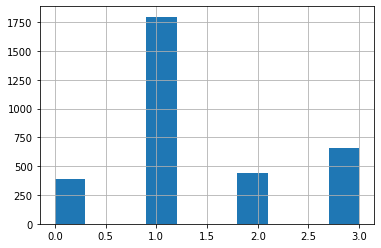

In [18]:
train_data["Label_Enc"].hist()

In [19]:
num_labels = len(np.unique(np.array(train_df["Label_Enc"])))

In [20]:
print(num_labels)

4


In [21]:
model_args = {
    "reprocess_input_data": True,
    "train_batch_size": 16,
    "num_train_epochs": 25,
    "fp16": True,
    "evaluate_during_training": True,
    "output_dir": "bert_model",
    "overwrite_output_dir": True,
    "save_steps": 1000,
    "use_early_stopping": True,
    "early_stopping_patience": 3,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "class_weight": "balanced"
}
model = ClassificationModel(
     "bert", 
     name,
     use_cuda=torch.cuda.is_available(), 
     args=model_args, 
     num_labels=num_labels,
)
model.train_model(train_df, show_running_loss = True, eval_df=val_df, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at Geotrend/bert-base-th-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Geotrend/bert-bas

  0%|          | 0/3286 [00:00<?, ?it/s]

Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Running Epoch 0 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 1 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 2 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 3 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 4 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 5 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 6 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 7 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 8 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 9 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 10 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 11 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 12 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 13 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 14 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 15 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 16 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 17 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 18 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 19 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 20 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 21 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 22 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 23 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

Running Epoch 24 of 25:   0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

(5150,
 defaultdict(list,
             {'global_step': [206,
               412,
               618,
               824,
               1030,
               1236,
               1442,
               1648,
               1854,
               2000,
               2060,
               2266,
               2472,
               2678,
               2884,
               3090,
               3296,
               3502,
               3708,
               3914,
               4000,
               4120,
               4326,
               4532,
               4738,
               4944,
               5150],
              'train_loss': [0.6690877079963684,
               0.9212849736213684,
               1.0146077871322632,
               0.6023457646369934,
               0.2366180419921875,
               0.3236897885799408,
               0.1459452360868454,
               0.52630615234375,
               0.38515982031822205,
               0.13936710357666016,
               0.03133646771311

In [22]:
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=sklearn.metrics.accuracy_score)

print(result)


  0%|          | 0/1027 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/129 [00:00<?, ?it/s]

{'mcc': 0.5559028717661456, 'acc': 0.7156767283349562, 'eval_loss': 1.9307770726754683}


In [23]:
test_data['text'] = test_data['text'].apply(process_text)
test_data['text'] = test_data['text'].apply(lambda x: ' '.join(x))

# Reset the index of the test data DataFrame
test_data = test_data.reset_index(drop=True)

In [24]:
true_labels = test_data['Label_Enc'].tolist()
pred_labels, _ = model.predict(test_data['text'].tolist())

report = classification_report(true_labels, pred_labels)
print(report)

  0%|          | 0/1027 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       132
           1       0.81      0.82      0.82       541
           2       0.50      0.48      0.49       159
           3       0.69      0.72      0.70       195

    accuracy                           0.72      1027
   macro avg       0.65      0.65      0.65      1027
weighted avg       0.71      0.72      0.71      1027

